# Data Mining Project: ABCDEats Inc. #

Fall Semester 2024-2025 <br>
Master in Data Science and Advanced Analytics <br>
NOVA Information Management School

**Group 19** <br>
Jan-Louis Schneider, 20240506  <br>
Marta Boavida, 20240519  <br>
Matilde Miguel, 20240549  <br>
Sofia Gomes, 20240848  <br>

## Project Description

In this project, you will act as consultants for ABCDEats Inc. (ABCDE), a fictional food delivery service partner- ing with a range of restaurants to offer diverse meal options. Your task is to analyse customer data collected over three months from three cities to help ABCDE develop a data-driven strategy tailored to various customer segments. The description of the data is provided under the Dataset Description section of this document. <br>

We recommend segmenting customers using multiple perspectives. Examples of segmentation perspec- tives include value-based segmentation, which groups customers by their economic value; preference or behaviour-based segmentation which focuses on purchasing habits; and demographic segmentation which categorises customers by attributes like age, gender, and income to understand different interaction pat- terns. <br>

Ultimately, the company seeks a final segmentation that integrates these perspectives to enable them to develop a comprehensive marketing strategy.

# <span style="color:brown"> Exploratory Data Analysis  </span> 

## Expected Outcomes ## Eliminar isto

* Conduct an in-depth exploration of the dataset. Summarise key statistics for the data, and discuss their possible implications. <br>
* Identifyanytrends,patterns,oranomalieswithin the dataset. Explore relationships between fea- tures. <br>
* Create new features that may help enhance your analysis. <br>
* Use visualisations to effectively communicate your findings.

In [1]:
import pandas as pd 
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
import warnings

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
df = pd.read_csv("../dataset/DM2425_ABCDEats_DATASET.csv")

## <span style="color:salmon"> Exploration of the dataset  </span> 
Conduct an in-depth exploration of the dataset. Summarise key statistics for the data, and discuss their possible implications

In [5]:
df.columns.values

array(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order',
       'last_promo', 'payment_method', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'], dtype=object)

In [6]:
df.head(10)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.0,0.00,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6aef2b6726,8670,40.0,2,2,0,0.0,2,FREEBIE,DIGI,0.00,24.92,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,8475ee66ef,2440,24.0,2,2,2,0.0,2,-,CARD,5.88,0.00,1.53,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
7,f2f53bcc67,8670,27.0,2,3,2,0.0,2,DISCOUNT,DIGI,11.71,0.00,24.40,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,5b650c89cc,2360,20.0,3,4,2,0.0,3,DISCOUNT,DIGI,2.75,0.00,0.00,0.0,0.0,0.0,0.0,4.39,0.00,0.0,0.0,0.0,7.3,0.0,0.0,0,0,1,0,0,0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
9,84775a7237,8670,20.0,2,3,0,0.0,3,DELIVERY,CARD,0.00,32.48,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df.info()

#Incorrect data types:
# customer_age (int)
# first_order (int)
# HR_0 (int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

##### Correct datatypes

In [8]:
df.dtypes
# Incorrect data types:
# customer_age (float - int)
# first_order (float - int)
# HR_0 (float - int)

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

In [9]:
df["customer_age"]= df["customer_age"].astype('Int64')
# convert "customer_age" from float to int

In [10]:
df["first_order"] = df["first_order"].astype("Int64")
# convert "first_order" from float to int

In [11]:
df["HR_0"] = df["HR_0"].astype("Int64")
# convert "HR_0" from float to int

### Duplicates

In [12]:
duplicates =df.duplicated().value_counts()
duplicates
# Identify number of duplicates in the dataset.

False    31875
True        13
Name: count, dtype: int64

In [13]:
percentage_duplicates = ((df.duplicated().mean()) * 100).round(3)
print(f"Percentage of Duplicates in the dataset is: {percentage_duplicates}%")
# Percentage of Duplicates in the dataset.

Percentage of Duplicates in the dataset is: 0.041%


In [14]:
df.drop_duplicates(inplace=True)
# Remove duplicates.

In [15]:
duplicates =df.duplicated().value_counts()
duplicates
# Confirm duplicates were correctly removed.

False    31875
Name: count, dtype: int64

### Missing Values

In [16]:
df.replace("", np.nan, inplace=True)
df.replace("-", np.nan, inplace=True)
# replace missing values with nan

In [17]:
missing_values = df.isna().sum()
missing_values

# Identify missing values:
# - customer_region 
# - customer age  
# - first order 
# - last promo
# - HR0 

#first_order => missing value ainda não comprou // 0 é que comprou hoje 

customer_id                     0
customer_region               442
customer_age                  727
vendor_count                    0
product_count                   0
is_chain                        0
first_order                   106
last_order                      0
last_promo                  16744
payment_method                  0
CUI_American                    0
CUI_Asian                       0
CUI_Beverages                   0
CUI_Cafe                        0
CUI_Chicken Dishes              0
CUI_Chinese                     0
CUI_Desserts                    0
CUI_Healthy                     0
CUI_Indian                      0
CUI_Italian                     0
CUI_Japanese                    0
CUI_Noodle Dishes               0
CUI_OTHER                       0
CUI_Street Food / Snacks        0
CUI_Thai                        0
DOW_0                           0
DOW_1                           0
DOW_2                           0
DOW_3                           0
DOW_4         

In [18]:
# Percentage of missing values in each variable:
missing_values_customer_region = ((df["customer_region"].isna().mean()) * 100).round(3)
missing_values_customer_age = ((df["customer_age"].isna().mean()) * 100).round(3)
missing_values_first_order = ((df["first_order"].isna().mean()) * 100).round(3)
missing_values_last_promo = ((df["last_promo"].isna().mean()) * 100).round(3)
missing_values_HR_0 = ((df["HR_0"].isna().mean()) * 100).round(3)

print(f"Percentage of missing values in customer_region is: {missing_values_customer_region}%")
print(f"Percentage of missing values in customer_age is: {missing_values_customer_age}%")
print(f"Percentage of missing values in first_order is: {missing_values_first_order}%")
print(f"Percentage of missing values in last_promo is: {missing_values_last_promo}%")
print(f"Percentage of missing values in HR_0 is: {missing_values_HR_0}%")

# Last promo has a significantly high percentage of missing values.

Percentage of missing values in customer_region is: 1.387%
Percentage of missing values in customer_age is: 2.281%
Percentage of missing values in first_order is: 0.333%
Percentage of missing values in last_promo is: 52.53%
Percentage of missing values in HR_0 is: 3.652%


### Descriptive statistics

#### DESCRIPTIVES - NUMERICAL FEATURES

In [19]:
df.describe().T
# only includes numerical features

,count,mean,std,min,25%,50%,75%,max
customer_age,31148.0,27.507545,7.161828,15.0,23.0,26.0,31.0,80.0
vendor_count,31875.0,3.102714,2.771753,0.0,1.0,2.0,4.0,41.0
product_count,31875.0,5.668424,6.957933,0.0,2.0,3.0,7.0,269.0
is_chain,31875.0,2.819357,3.977977,0.0,1.0,2.0,3.0,83.0
first_order,31769.0,28.469924,24.104626,0.0,7.0,22.0,45.0,90.0
last_order,31875.0,63.672376,23.227992,0.0,49.0,70.0,83.0,90.0
CUI_American,31875.0,4.877205,11.647043,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31875.0,9.955306,23.561492,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31875.0,2.298224,8.475868,0.0,0.0,0.0,0.0,229.22
CUI_Cafe,31875.0,0.80149,6.428422,0.0,0.0,0.0,0.0,326.1


In [28]:
# FINAL INSIGHTS:

# Customer age: 
# - average customer is 27.5 
# - youngest costumer=15y // oldest customer = 80y
# - 75% of customers are 31yo or younger
# - oldest customer= 80yo (outlier??) 

# most of customers are young, there are a few older individuals in the dataset. 

# Further analysis: 
# oldest customer= 80yo (outlier??)


# vendor count: (nº unique vendors customer has ordered from) 
# - entries with 0 (needs further exploration) 
# - average vendor count is 3
# - 75% of unique vendors customers have ordered from is 4
# - max vendor count is 41 (outlier??)

# Most customers ordered from few vendors, but there are customers with much higher count 

# Further analysis:
# entries with 0 (?)
# max vendor count is 41 (outlier??)


# product_count: (Total number of products the customer has ordered. ) 
# entries with 0 products (no products purchased) 
# max product count is 269 (outlier)
# Most product count is low

# Further analysis:
# max product count is 269 (outlier??)
# entries with 0 products (no products purchased) 


# is_chain: (number of orders made in chain restaurants):
# relative small amount of orders made in chain restaurants 
# max nº orders made in chain is 83

# - most count of orders made in chain restaurants is low, but there are customers with a very high number of orders in chain (outlier??) 

# Further analysis:
# is_chain represents nº of orders in chain restaurant or the chain_restaurant id?


# first_order: (nº of days from the start of dataset where customer first placed an order): 
# - On average customers place their first order 28 days after joining the app
# - st dev = 24.1 suggests a wide spread in values of first orders. (significant variability in the amount of time customers take to make their first order)
# - min = 0 (customers who did their first order today)
# - max = 90 (outlier??)
# - 75% of customers placed their first order 45 days after entering the database

# further_analysis:
# first_order= 0 
# max = 90 (outlier??)


# last order: (nº of days from the start of the dataset where customer last placed an order):  
# - st dev= 23 suggests a wide spread in values of first orders. (significant variability in the amount of time customers take to make their first order)
# - min = 0 (can indicate the customer placed their first order on the first day they joined the dataset/didnt do an order yet compare with min first order)

# further analysis:
# last_order = 0 
# first_order = last_order (?) 


## OVERALL ANALYSIS CUISINE TYPES: 
# - Average may not be a good comparison measure due to the presence of extreme values. mean low bcs high spenders are a low fraction of the total dataset. 
# Their spending dont increase the overall avg significance.
# - 75% of customers spend nothing or a significant small amount (Asian & American cuisines) in all cuisine types, the maximum values of these cuisines 
# - Are significantly high (specially for American (280) and Asian (896) cuisines which indicate the presence of potential outliers who frequently order or spend heavily.

# Further analysis:
# outliers (??)

# DW_0-DW_6: (plot different hours of the day to see peak days)
# - 75% of customers ordered 1 time in that day 
# the max indicate the presence of outliers and suggests the peak 

# most customers only ordered 1 time in each day of the week.

# further analysis:
# max outlier(??)


# Hours of the day
# HR_0 : No activity at midnight 
# HR_1-23: 75% of customers placed no order in these hours. Max can be outlier or unusual behavior.

# Further_analysis:
# HR_0 : No activity at midnight 
# max outlier (??)

In [20]:
df.describe(include="object").T

,count,unique,top,freq
customer_id,31875,31875,fd40d3b0e0,1
customer_region,31433,8,8670,9761
last_promo,15131,3,DELIVERY,6282
payment_method,31875,3,CARD,20153


In [30]:
# Customer_region:
# Customers are from 8 different regions
# Most customers are located in region 8670
# Missing values 

# last_promo: 
# There are promotions in 3 different categories 
# Most customers use promotions in the delivery category
# missing values

# payment_method: 
# There are 3 different payment methods used by customers
# Most customers use Card as their preferred payment method

### Search for strange values in Categorical Data:

In [21]:
# No strange value found
df["customer_region"][df["customer_region"].notna()].unique()
# Different regions where customers are located

array(['2360', '8670', '4660', '2440', '4140', '2490', '8370', '8550'],
      dtype=object)

In [22]:
# No strange value found
df["last_promo"][df["last_promo"].notna()].unique()
# Different types of discounts used by customers

array(['DELIVERY', 'DISCOUNT', 'FREEBIE'], dtype=object)

In [23]:
# No strange value found
df["payment_method"].unique()
# Different types of payment methods used by customers

array(['DIGI', 'CASH', 'CARD'], dtype=object)

## <span style="color:salmon"> JANNY  </span> 
Identify any trends, patterns, or anomalies within the dataset. Explore relationships between features.

In [30]:
df.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

In [31]:
ncols = df.select_dtypes(include=['int64', 'float64'])   #numerical columns
ccols = df.select_dtypes(include=['object', 'category'])   # categorical columns

In [32]:
corr_matrix = ncols.corr(method='pearson')
#corr_matrix = ncols.corr(method='spearman')
filtered_corr_matrix = corr_matrix[(corr_matrix >= 0.65) | (corr_matrix <= -0.65)]
filtered_corr_matrix
# correlations higher than |0.65|

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vendor_count,NaN,1.000000,0.827602,0.762893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_count,NaN,0.827602,1.000000,0.827070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.664808,0.673647,0.675676,0.673107,0.656139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_chain,NaN,0.762893,0.827070,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_order,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_order,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUI_American,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUI_Asian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUI_Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUI_Cafe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# high correlation between vendorcount/productcount
# between is_chain/vendorcount
# productcount/ischain
# but could be because of similar values in total (between 0 and 20 mostly

# pearson:
# productcount 0.65 corr with DOW_0 to DOW_4, not with DOW_5 or DOW_6    ,useful?

In [33]:
df.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

In [34]:
# grouping Data by Payment_method and comparing means or value counts(depending on num or cat) for each feature per payment method

# df.groupby(['payment_method'])['last_promo'].value_counts(normalize=True)  # for categorical features
df.groupby(['payment_method'])['customer_age'].mean()   # for numerical features
 
# grouped by payment method observations:
# - age no difference - vendor_count at CARD the highest, CASH lowest - product count at CARD the highest, CASH lowest   (DIGI always closer to CASH)
# - ischain at CARD highest, CASH lowest (DIGI close to CASH) - first_order CASH highest CARD lowest, DIGI close to CASH again
# - last order CASH lowest, CARD highest, DIGI close to cash
# - lastpromo: CASH way more delivery, DIGI also way more delivery, CARD more close but still,CASH lowest freebie otherwise discount/freebie almost same
# - can see differences in DOW and HR, but no significant difference between the payment methods
# - I dont think we find a difference in payment methods depending on CUI

payment_method
CARD    27.500356
CASH    27.490371
DIGI    27.547195
Name: customer_age, dtype: Float64

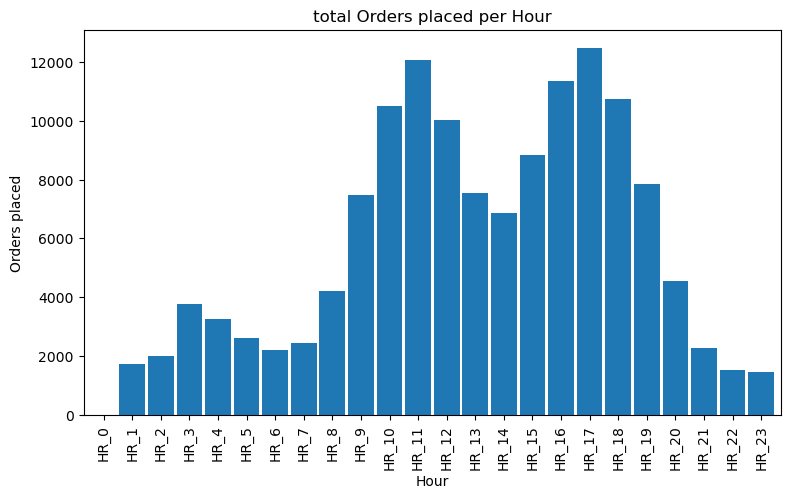

In [35]:
# visualization of total Orders placed per Hour
HRs = [f'HR_{i}' for i in range(24)]

df[HRs].sum().plot(kind='bar', figsize=(9, 5), width=0.9)
plt.grid(axis='y', linestyle='-', linewidth=0, color='gray')
plt.xlabel('Hour')
plt.ylabel('Orders placed')
plt.title('total Orders placed per Hour')
plt.grid(axis='y')
plt.show()

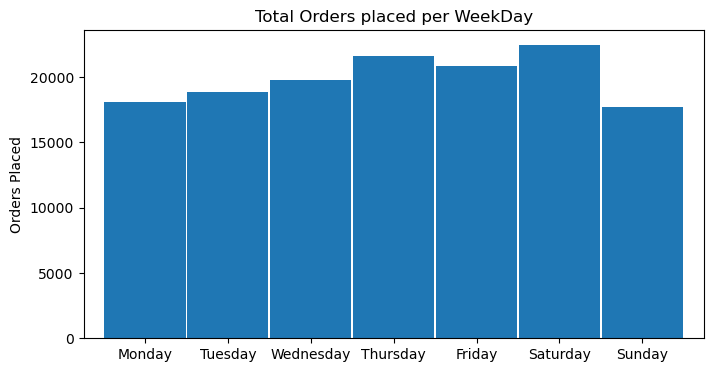

In [36]:
# visualization of total Orders placed per Day
dows = ['DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'DOW_0'] # this order so it is from Monday to Sunday, not Sunday to Saturday

df[dows].sum().plot(kind='bar', figsize=(8, 4), width=0.98)
plt.title('Total Orders placed per WeekDay')
plt.grid(axis='y', linestyle='-', linewidth=0, color='gray')
plt.xticks(ticks= [0,1,2,3,4,5,6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.ylabel('Orders Placed')
plt.grid(axis='y')
plt.show()

In [37]:
# grouping Data by customer_age and comparing means or value counts(depending on num or cat) for each feature per age
warnings.filterwarnings('ignore')
df['customer_age'].sort_values().unique()
binsAge = [15, 18, 23, 29, 36, 51, 64, 81]        # classficating age in groups, 15-17, 18-22 etc
labelsAge = ['15-17', '18-22', '23-28', '29-35', '36-50', '51-63', '64+']
df['customer_age_group'] = pd.cut(df['customer_age'], bins=binsAge, labels=labelsAge, right=False)

# df.groupby(['customer_age_group'])['last_promo'].value_counts(normalize=True)   # for categorical
df.groupby(['customer_age_group'])['DOW_0'].mean()      # for numerical

# grouped by Customer_Age observations: (some based on the plots below)
# - vendor count not really different, oldest people have highest but not significant -  
# - DIGI low with old age group (but small sample), CASH higher for two oldest groups
# - Product count mean increases with older age
# - is_chain increasing until last age where big decrease (again low sample?), plot necessary?
# - first_order no diff except last age again (?)
# - last_order increasing by age, big increase last one
# - last promo same except freebie way lower with second oldest, and discount way bigger while delivery smaller at last age (small sample?)
# - Dow Sunday the older the more, oldest group wild changes prob again cuz of small sample
# - HR1: after age 35 decreasing but very low values, HR3: decreasing for last 2 ages (they have low values), generally often 15-17 highest values, why?
#   HR11: big number for 2nd oldest group rest equal, HR12: equal except oldest, HR17,18: increases after 35
# - CUI: Asian: clear increase by age, Cafe: very low before 18, beverages: very high before 18 (maybe because easier without ID?), 
#   Chicken, Chinese, Dessert: decreasing only in last 2-3 ages groups, Healthy high on 23-28 and very old (maybe because getting older?)
#   Other: increasing by age

customer_age_group
15-17    0.553425
18-22    0.522374
23-28    0.564884
29-35    0.554881
36-50    0.583579
51-63    0.621538
64+      0.685185
Name: DOW_0, dtype: float64

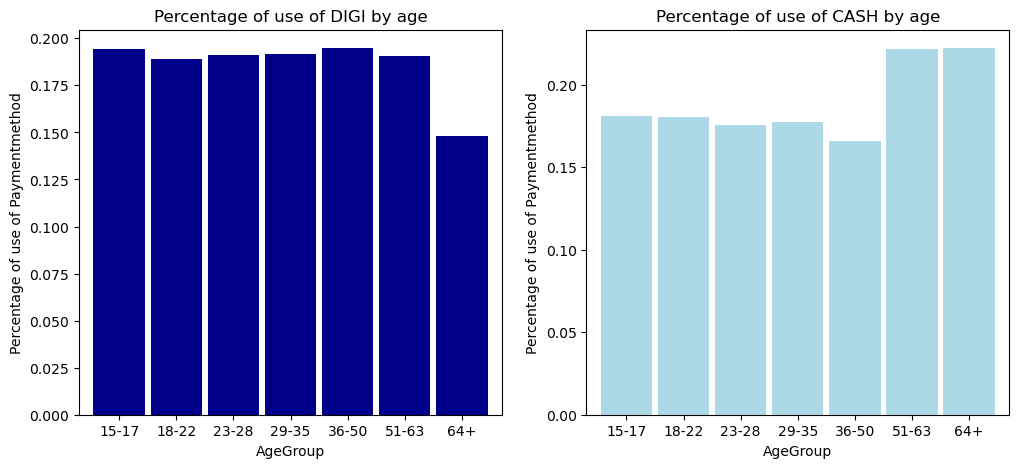

In [38]:
#Plot for Payment method used based on AGE
warnings.filterwarnings('ignore')
Age_CASH = df[df['payment_method'] == 'CASH'].groupby('customer_age_group')['payment_method'].count().div(df.groupby('customer_age_group')['payment_method'].count())
Age_DIGI = df[df['payment_method'] == 'DIGI'].groupby('customer_age_group')['payment_method'].count().div(df.groupby('customer_age_group')['payment_method'].count())
fig, iplot = plt.subplots(1, 2, figsize=(12, 5))
Age_CASH.plot(kind='bar', color='lightblue', width=0.9, ax=iplot[1])
iplot[1].set_ylabel('Percentage of use of Paymentmethod')
iplot[1].set_xlabel('AgeGroup')
iplot[1].set_xticks(range(len(Age_CASH.index)))
iplot[1].set_xticklabels(Age_CASH.index, rotation=0) 
iplot[1].set_title('Percentage of use of CASH by age')

Age_DIGI.plot(kind='bar', color='darkblue', width=0.9, ax=iplot[0])
iplot[0].set_ylabel('Percentage of use of Paymentmethod')
iplot[0].set_xlabel('AgeGroup')
iplot[0].set_xticks(range(len(Age_CASH.index)))
iplot[0].set_xticklabels(Age_CASH.index, rotation=0)
iplot[0].set_title('Percentage of use of DIGI by age')
warnings.filterwarnings('default')

/var/folders/9b/jd3m9d1938sb3269cy5k5rzh0000gn/T/ipykernel_37963/2745881837.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['customer_age_group'])['product_count'].mean().plot(kind='line', figsize=(6,3), marker='o')


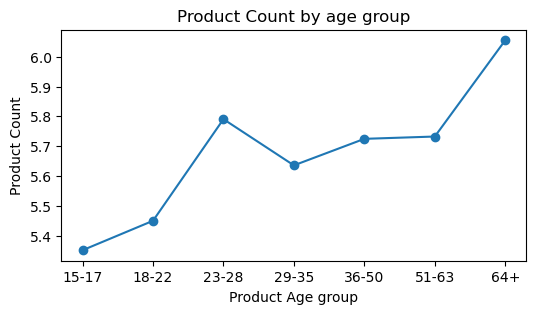

In [39]:
# Product Count by age group
df.groupby(['customer_age_group'])['product_count'].mean().plot(kind='line', figsize=(6,3), marker='o')
plt.title("Product Count by age group")
plt.xlabel("Product Age group")
plt.ylabel("Product Count")
plt.show()

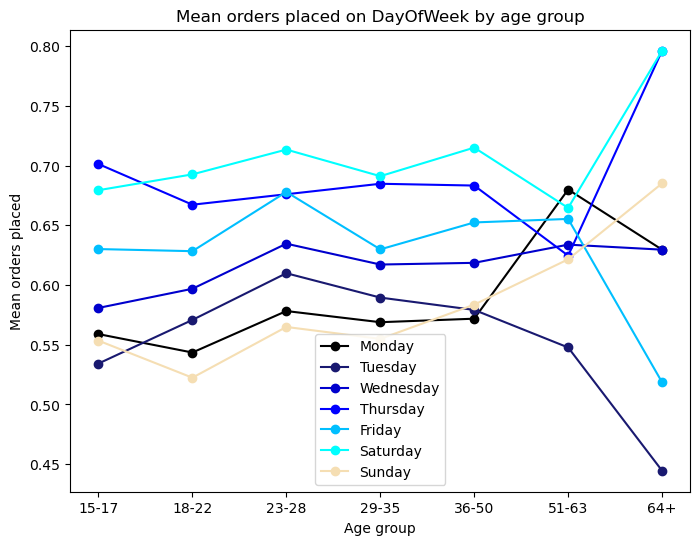

In [40]:
# mean of orders placed per Weekday based on age
# colors going from dark to light (monday to sunday), so the lighter the color the later in the week
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,6))
df.groupby(['customer_age_group'])['DOW_1'].mean().plot(marker='o', color='black', label="Monday")#, width=0.98)
df.groupby(['customer_age_group'])['DOW_2'].mean().plot(marker='o', color='midnightblue', label="Tuesday")
df.groupby(['customer_age_group'])['DOW_3'].mean().plot(marker='o', color='mediumblue', label="Wednesday")
df.groupby(['customer_age_group'])['DOW_4'].mean().plot(marker='o', color='blue', label="Thursday")
df.groupby(['customer_age_group'])['DOW_5'].mean().plot(marker='o', color='deepskyblue', label="Friday")
df.groupby(['customer_age_group'])['DOW_6'].mean().plot(marker='o', color='aqua', label="Saturday")
df.groupby(['customer_age_group'])['DOW_0'].mean().plot(marker='o', color='wheat', label="Sunday")
plt.title("Mean orders placed on DayOfWeek by age group")
plt.legend()
plt.xlabel("Age group")
plt.ylabel("Mean orders placed")
plt.show()
warnings.filterwarnings('default')

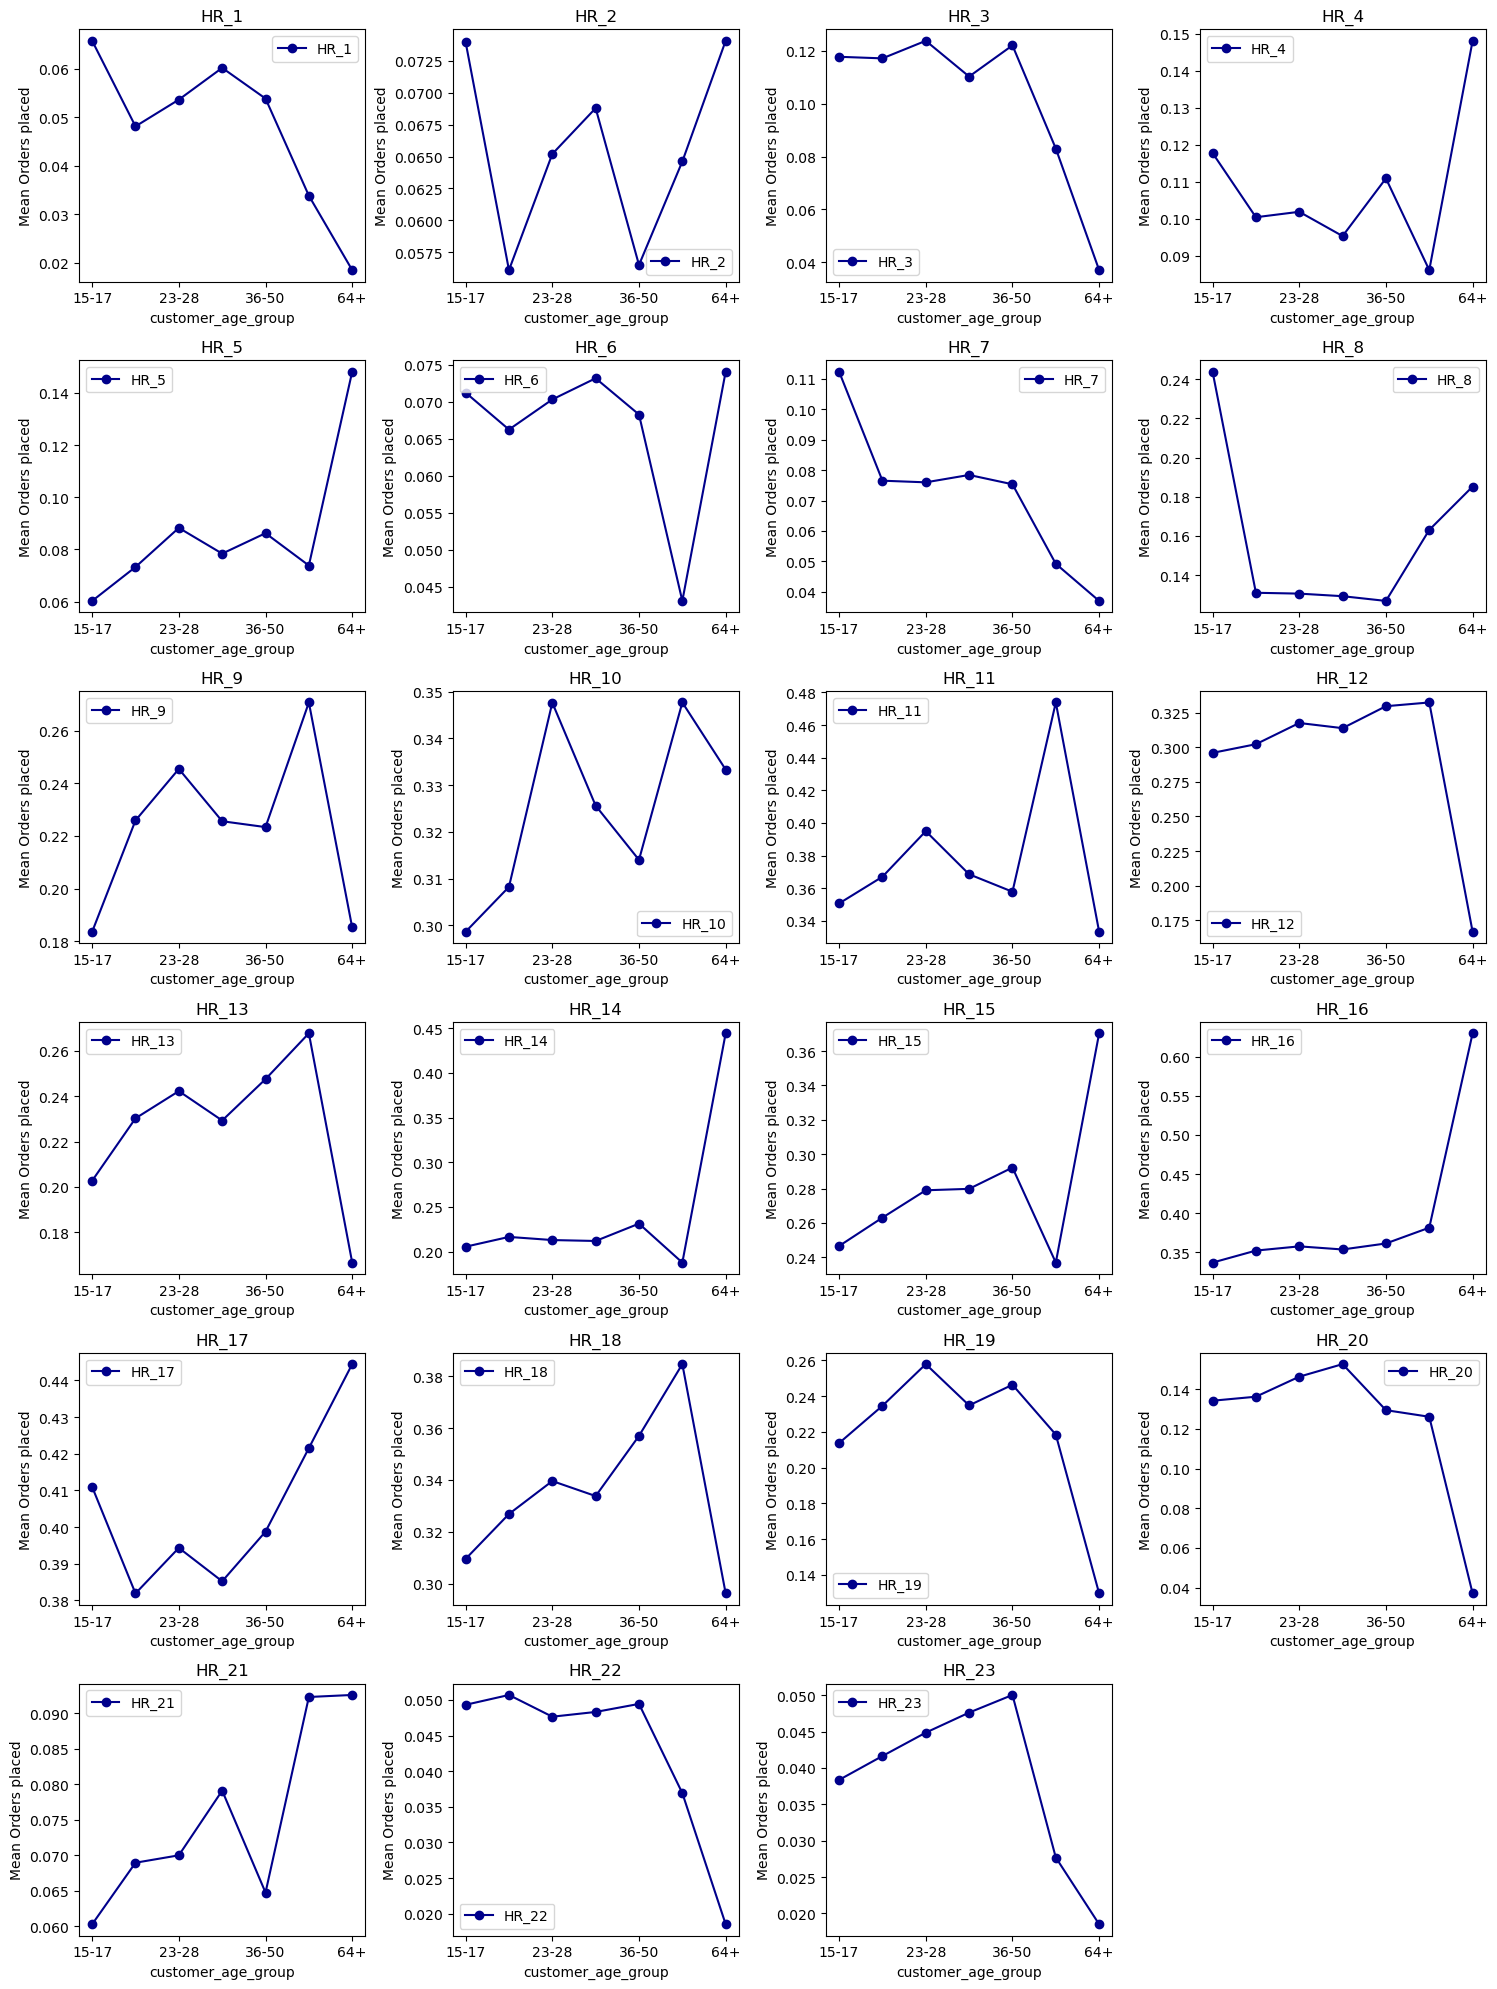

In [41]:
# mean orders placed per Hour based on age
warnings.filterwarnings('ignore')
fig, aplots = plt.subplots(6, 4, figsize=(15, 20))
aplots = aplots.flatten()
HRcolumns = df.loc[:, 'HR_1':'HR_23'].columns
for i, col in enumerate(HRcolumns):
    df.groupby('customer_age_group')[col].mean().plot(ax=aplots[i], marker='o', color='darkblue', label=col)   
    aplots[i].set_title(col)
    aplots[i].set_xlabel('customer_age_group')
    aplots[i].set_ylabel('Mean Orders placed')
    aplots[i].legend()
fig.delaxes(aplots[23])
plt.tight_layout()
plt.show()

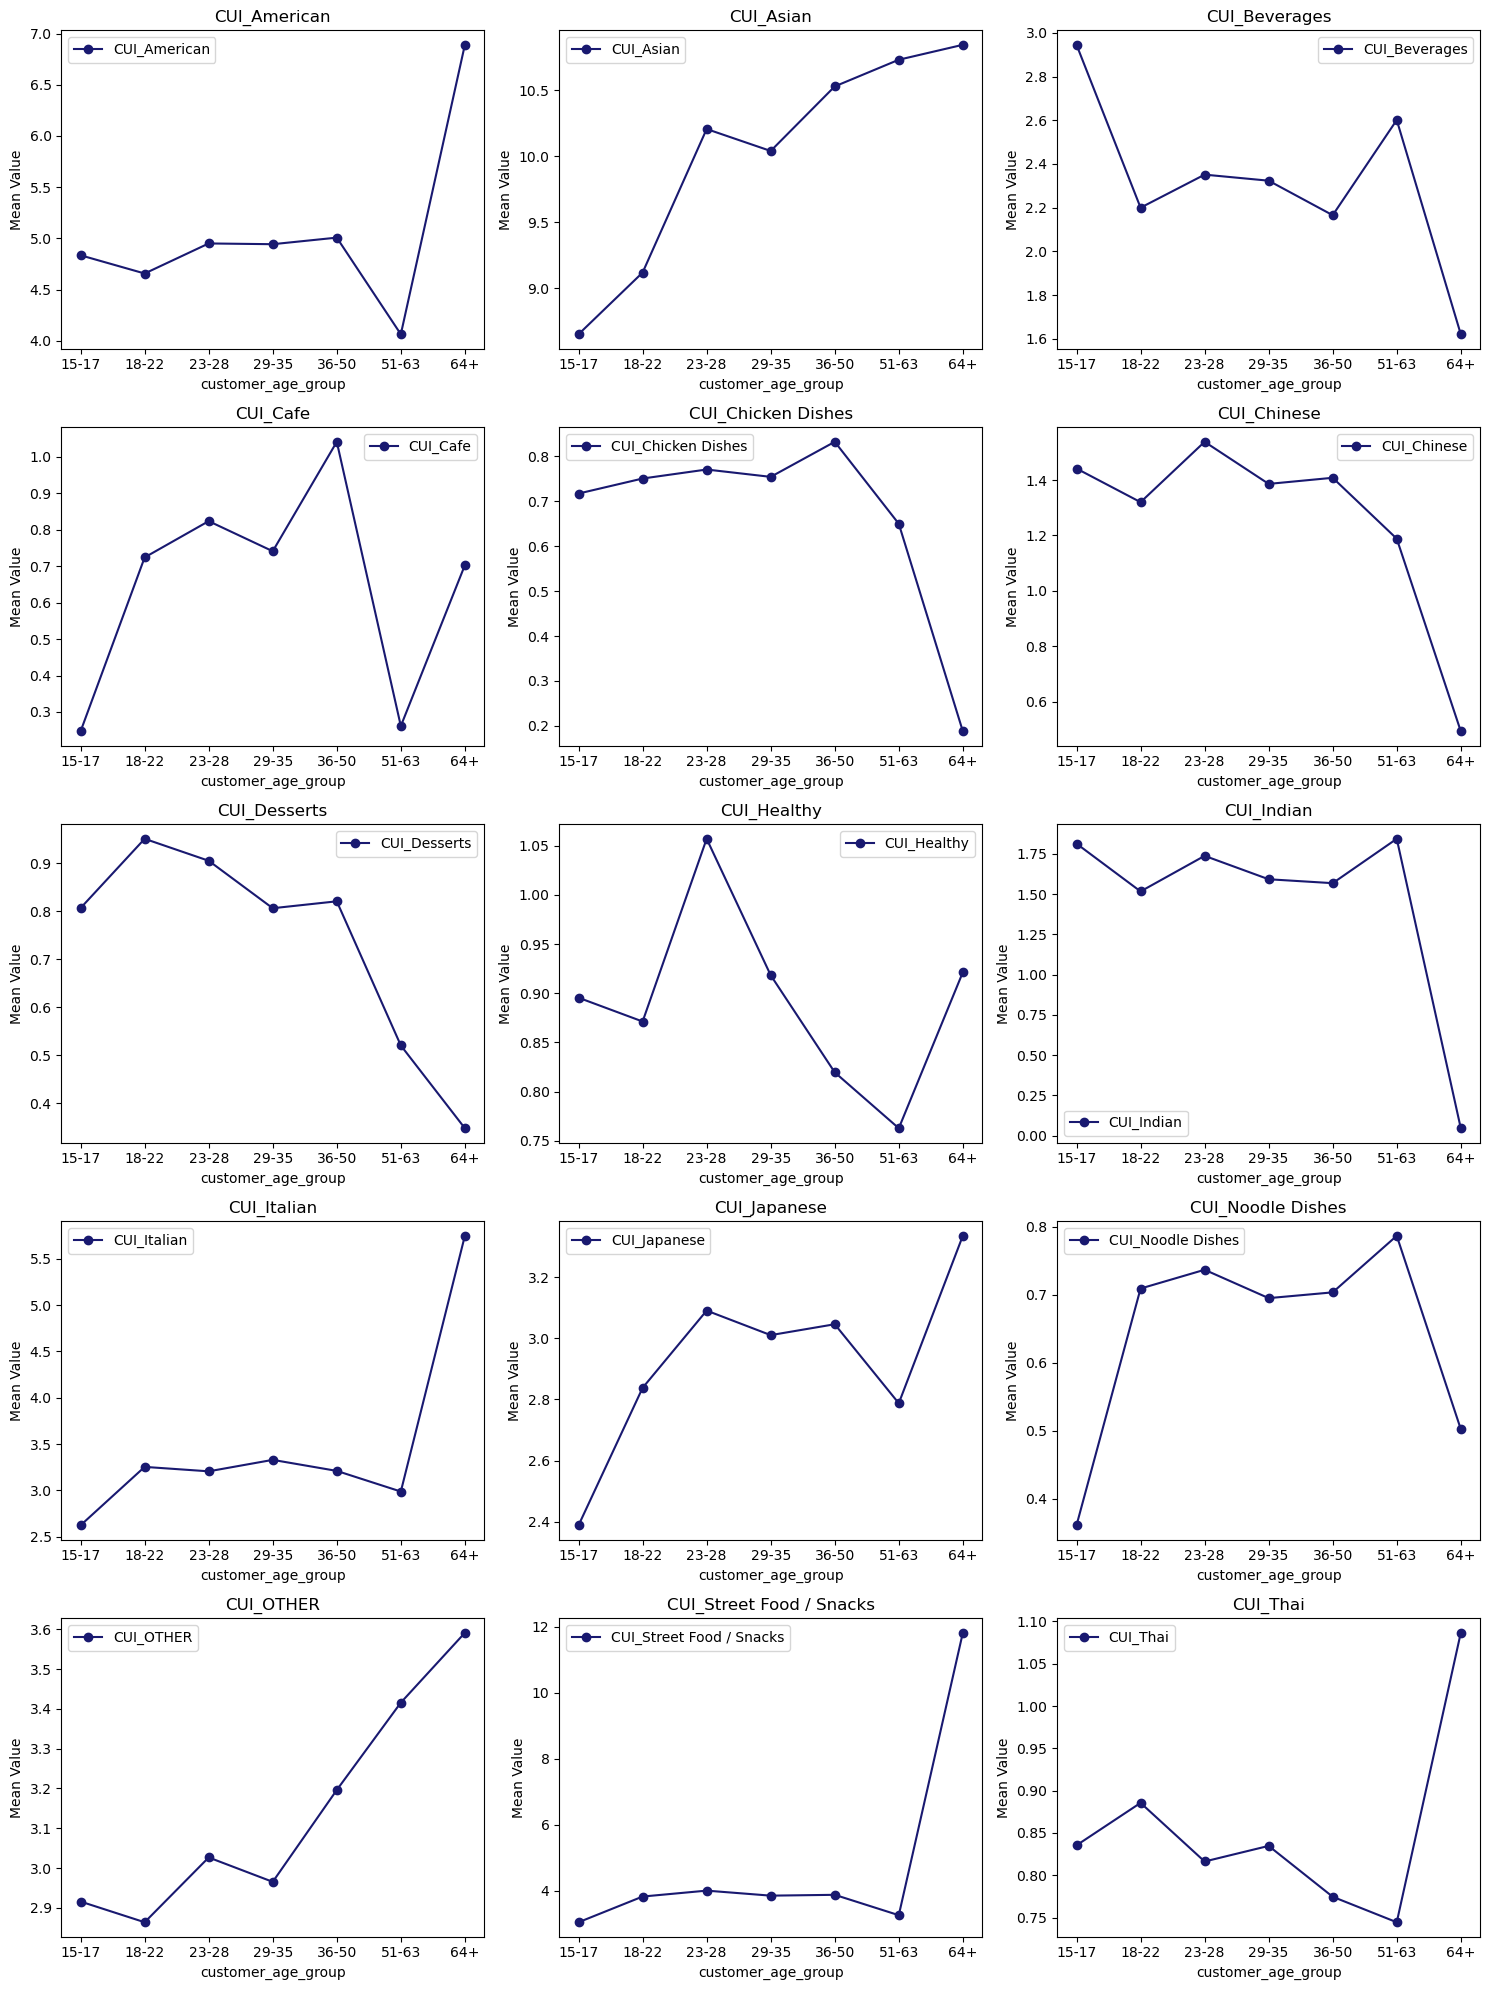

In [42]:
# Plotting the amount of money spent on cuisines based on age

fig, aplots = plt.subplots(5, 3, figsize=(15, 20))
aplots = aplots.flatten()
CUIcolumns = df.loc[:, 'CUI_American':'CUI_Thai'].columns
for i, col in enumerate(CUIcolumns):
    df.groupby('customer_age_group')[col].mean().plot(ax=aplots[i], marker='o', color='midnightblue', label=col)   
    aplots[i].set_title(col)
    aplots[i].set_xlabel('customer_age_group')
    aplots[i].set_ylabel('Mean Value')
    aplots[i].legend()
plt.tight_layout()
plt.show()
warnings.filterwarnings('default')

In [43]:
df.head()   # final dataset, just added the age group column at the end so far I think

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,customer_age_group
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,18-22
1,5d272b9dcb,8670,17,2,2,2,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,15-17
2,f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36-50
3,180c632ed8,4660,<NA>,2,3,1,0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,NaN
4,4eb37a6705,4660,20,2,5,0,0,2,NaN,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18-22


In [64]:
# What else? maybe check special hours/days for foods, for example more beverages at night etc?
# last promo with food compare, 
# product count (what do the more active users order/prefere)

## <span style="color:salmon"> New Features  </span> 
Create new features that may help enhance your analysis.

**Customer Lifetime** <br>
interval of customer activity, so we have an idea of ​​how many days the customer ordered


In [44]:
df['lifetime_days'] = df['last_order'] - df['first_order']

**Most frequent order day of the week**

In [45]:
def frequent_days(customer):
    max_value = customer[dows].max() # Day with the most orders
    days_max = []
    for col in dows: # Checks if there is more than one day with max_value
        if customer[col] == max_value:
            days_max.append(col)
    result = ', '.join(days_max) # We get a comma separated string
    return result
    
df['preferred_order_days'] = df.apply(frequent_days, axis=1)

**Most frequent part of the day**   
6h-12h --> Morning (Breakfast)  
12h-18h --> Afternoon (Lunch)  
18h-00h --> Evening (Dinner)  
00h-6h --> Night

In [46]:
def part_of_the_day(hour):
    if 6 <= hour < 12:
        return '06h-12h'
    elif 12 <= hour < 18:
        return '12h-18h'
    elif 18 <= hour < 24:
        return '18h-00h'
    else:  # 0 <= hour < 6
        return '00h-06h'

def frequent_hours(customer):
    part_counts = {
        '06h-12h': 0,
        '12h-18h': 0,
        '18h-00h': 0,
        '00h-06h': 0}
    for hour in range(24):
        num_orders = customer[f'HR_{hour}']
        if pd.isna(num_orders): # Ignore NaN
            continue
        part_of_day = part_of_the_day(hour)
        part_counts[part_of_day] += num_orders

    # Part of the day with the highest number of orders
    max_value = 0
    most_frequent_parts = []
    for part, count in part_counts.items():
        if count > max_value:
            max_value = count  
            most_frequent_parts = [part] 
        elif count == max_value:
            most_frequent_parts.append(part) 

    result = ', '.join(most_frequent_parts) # We get a comma separated string
    return result
    
df['preferred_part_of_day'] = df.apply(frequent_hours, axis=1)

**Total monetary units spend**

In [47]:
cuisine = df.filter(like='CUI_').columns.tolist() # Types of cuisine

df['total_expenses'] = df[cuisine].sum(axis=1)

**Average monetary units per product**

In [48]:
df['avg_per_product'] =df['total_expenses'] / df['product_count'].replace(0, pd.NA)

**Average monetary units per order**

In [49]:
df['avg_per_order'] = df['total_expenses'] / df[dows].sum(axis=1).replace(0, pd.NA)

**Average order size**  
Help identifing users who make larger orders

In [50]:
df['avg_order_size'] = df['product_count'] / df[dows].sum(axis=1).replace(0, pd.NA)

**Culinary profile**  

In [51]:
df['culinary_variety'] = df[cuisine].gt(0).sum(axis=1)

#df[cuisine_columns].gt(0): Este método retorna um DataFrame booleano onde True indica que houve um pedido (ou seja, o gasto é maior que zero) e False indica que não houve pedido (gasto é zero ou ausente).
##usei o chatgpt


###### n sei se preferem em percentagem ou em quantidade de variedades
#total_cuisine = len(cuisine)
#df['% culinary_variety'] = (df['Culinary_Variety'] / total_cuisines) * 100

**Loyalty to chain restaurants**  
Proportion of orders from restaurant chains

In [52]:
df['chain_preference'] = df['is_chain'] / df[dows].sum(axis=1).replace(0, pd.NA)

**Loyalty to venders**  
##este aqui nao sei muito bem  
High tend to be more loyal to specific restaurants.

In [149]:
df['loyalty_to_venders'] = df[dows].sum(axis=1) / df['vendor_count'].replace(0, pd.NA)

**Order Consistency**  
Measures order consistency by day and hour, helping you understand whether the customer has a routine ordering pattern

In [152]:
df['Order_Variability'] = df[dows + [f'HR_{hour}' for hour in range(24)] ].std(axis=1)

In [53]:
df.head(20)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,customer_age_group,lifetime_days,preferred_order_days,preferred_part_of_day,total_expenses,avg_per_product,avg_per_order,avg_order_size,culinary_variety,chain_preference
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,28.88,0.0,0.00,0.0,0.0,0.00,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,18-22,1,"DOW_6, DOW_0",18h-00h,28.88,5.776,14.44,2.5,1,0.5
1,5d272b9dcb,8670,17,2,2,2,0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,15-17,1,"DOW_6, DOW_0",06h-12h,19.21,9.605,9.605,1.0,2,1.0
2,f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36-50,1,"DOW_6, DOW_0",06h-12h,9.20,4.6,4.6,1.0,1,1.0
3,180c632ed8,4660,<NA>,2,3,1,0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.00,0.00,0.0,0.00,17.86,0.0,0.00,0.0,0.0,0.00,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,NaN,2,"DOW_1, DOW_6","06h-12h, 12h-18h",31.56,10.52,15.78,1.5,2,0.5
4,4eb37a6705,4660,20,2,5,0,0,2,NaN,DIGI,14.57,40.87,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18-22,2,"DOW_1, DOW_6",06h-12h,55.44,11.088,27.72,2.5,2,0.0
5,6aef2b6726,8670,40,2,2,0,0,2,FREEBIE,DIGI,0.00,24.92,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36-50,2,"DOW_1, DOW_6",00h-06h,24.92,12.46,12.46,1.0,1,0.0
6,8475ee66ef,2440,24,2,2,2,0,2,NaN,CARD,5.88,0.00,1.53,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,23-28,2,"DOW_1, DOW_6","06h-12h, 12h-18h",7.41,3.705,3.705,1.0,2,1.0
7,f2f53bcc67,8670,27,2,3,2,0,2,DISCOUNT,DIGI,11.71,0.00,24.40,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,23-28,2,"DOW_1, DOW_6","06h-12h, 12h-18h",36.11,12.036667,18.055,1.5,2,1.0
8,5b650c89cc,2360,20,3,4,2,0,3,DISCOUNT,DIGI,2.75,0.00,0.00,0.0,0.00,0.00,0.0,4.39,0.00,0.0,0.00,0.0,7.3,0.00,0.0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,18-22,3,DOW_6,18h-00h,14.44,3.61,4.813333,1.333333,3,0.666667
9,84775a7237,8670,20,2,3,0,0,3,DELIVERY,CARD,0.00,32.48,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18-22,3,"DOW_2, DOW_6",00h-06h,32.48,10.826667,16.24,1.5,1,0.0
